# Face Detection using Dliban MMOD CNN model

## You can download the requiered files form:
* [shape_predictor_68_face_landmarks](https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat "from github")
* [mmod_human_face_detector](https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2 "from github")

### put it in `.\models`

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt

In [4]:
def faceLandmarks(im,cnn = False):

    PREDICTOR_PATH = r"../../models/shape_predictor_68_face_landmarks.dat"
    
    # Create object to detect the face
    Detector =  dlib.get_frontal_face_detector() if not cnn else dlib.cnn_face_detection_model_v1(r"../../models/mmod_human_face_detector.dat")

    # Create object to detect the facial landmarks
    landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

    # Detect faces
    faceRects = Detector(im, 1)

    # Initialize landmarksAll array
    landmarksAll = []

    # For each face detected in the image, this chunk of code creates a ROI around the face and pass it as an argument to the 
    # facial landmark detector and append the result to the array landmarks 
    for i in range(0, len(faceRects)):
        newRect = dlib.rectangle(int(faceRects[i].left()),
                            int(faceRects[i].top()),
                            int(faceRects[i].right()),
                            int(faceRects[i].bottom()))
        landmarks = landmarkDetector(im, newRect)
        landmarksAll.append(landmarks)

    return landmarksAll, faceRects
  
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

def renderFacialLandmarks(im, landmarks,faceRectangles):
    
    for landmark in landmarks:
      points = [(p.x, p.y) for p in landmark.parts()]

      for p in points:
          cv2.circle(im, (int(p[0]),int(p[1])), 2, (255,0,0),-1)
          
    boxes = [convert_and_trim_bb(image, r) for r in faceRectangles]
    face_number = 0
    for (x, y, w, h) in boxes:
      cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
      crop = im[y:y+h, x:x+w]
      cv2.imwrite(f"./result/DLib/face-with-landmarks-{face_number}.jpg",crop)
      face_number+=1
    return im


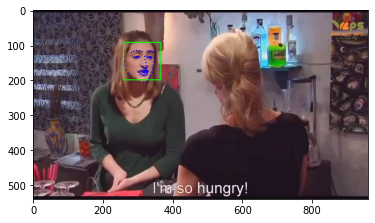

In [5]:
image = cv2.imread("../../images/001.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
landmarksAll, faceRects = faceLandmarks(rgb)
im  = renderFacialLandmarks(image,landmarksAll,faceRects)
RGB_img = cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
plt.imshow(RGB_img)
plt.show()
